#整個執行程序
## 請先複製一份到自己的雲端硬碟
##1安裝whisper
##2安裝語音處理 副程式
##3.連到自己的 google drive
##4.將要做語音辨識的檔案放到google drive 的Colab Notebooks目錄下,目前預設檔名是test.mp3,請放一個test.mp3到這目錄,並檢查檔案是否正確
##5.執行語音辨識
##6.看辨識結果在google drive 的Colab Notebooks目錄下,副檔名為txt,前面檔名


In [ ]:
! pip install openai-whisper # 安裝語音辨識主程式若有錯誤訊息不用管理他 ,每次重新開機或很久沒用,整段都要執行

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0

In [ ]:

!sudo apt update && sudo apt install ffmpeg ##安裝語音處理副程式,也是每次進來要重新執行

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,920 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,104 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/univers

In [ ]:
# 音檔若放在google drive要mount到自己的google drive

下一段程式執行後,會出現要求授權google drive,要連線至Goolge 雲端硬碟 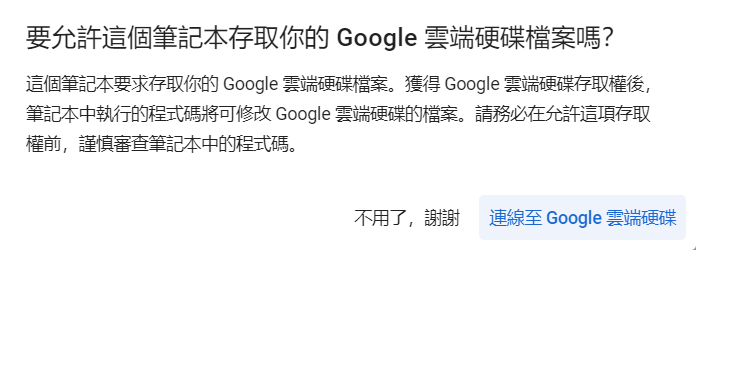

選擇email,並往下拉到允許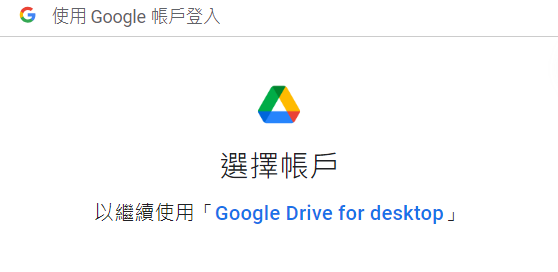

In [ ]:
#連到到自己的google drive
#也可以直接上傳不必放google drive
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
# 把要辨識的檔案放到Colab Notebooks
# 錄音檔若有空白如等會議或休息時間建議先用vad


In [ ]:
!ls vadwav/*.wav -all #列出所有mp3檔檢查檔案是否在,目前預計使用test.mp3


-rw------- 1 root root 52278862 Mar 22 09:46 vadwav/566.wav
-rw------- 1 root root 58860494 Mar 22 09:49 vadwav/597.wav
-rw------- 1 root root 55039822 Mar 22 09:53 vadwav/609.wav
-rw------- 1 root root 68578382 Mar 22 09:56 vadwav/626.wav


In [ ]:
!ls *.mp3

'testpre2 (1).mp3'


In [ ]:
#單個檔案改名字即可,語音辨識完會產生同樣名字,但副檔名不同,如以test.mp3為例,輸出為test.txt純文字檔,test.srt為可以上到youtube字幕格式,
#把你的聲音檔,mp3,: flac, mp3, mp4, mpeg, mpga, m4a, ogg, wav, or webm放在c
from datetime import datetime
print(datetime.now())

%time !whisper "testpre2 (1).mp3" --model large-v2 --language Chinese
print(datetime.now())

2024-04-03 02:53:20.793231
[00:00.000 --> 00:03.240] 您累積了三屆總統選舉的經驗
[00:03.240 --> 00:07.640] 您要如何做給傳承下一個民進黨總統參選人
[00:07.640 --> 00:09.200] 賴副總統呢
[00:09.200 --> 00:12.320] 那您也是民進黨最懂選舉的人
[00:12.320 --> 00:14.200] 所以您想要用什麼方式
[00:14.200 --> 00:16.000] 可不可以直接跟我們講一下
[00:16.000 --> 00:17.600] 要告訴賴副總統
[00:17.600 --> 00:18.280] 謝謝
[00:21.280 --> 00:24.280] 你說我是最會選舉的這件事情
[00:24.280 --> 00:26.680] 我看社會會有很大的分歧
[00:28.080 --> 00:28.880] 所以
[00:30.520 --> 00:34.720] 我作為候選人跟現在的總統
[00:34.720 --> 00:36.800] 我想告訴各位一件事
[00:36.800 --> 00:41.400] 做總統是不能被教的
[00:41.400 --> 00:46.720] 做總統是要展現自我的能力
[00:46.720 --> 00:51.200] 跟我們社會大眾產生的共鳴才是重點
CPU times: user 318 ms, sys: 38.6 ms, total: 356 ms
Wall time: 55.2 s
2024-04-03 02:54:16.007681


In [ ]:
#單個檔案改名字即可,語音辨識完會產生同樣名字,但副檔名不同,如以test.mp3為例,輸出為test.txt純文字檔,test.srt為可以上到youtube字幕格式,
#把你的聲音檔,mp3,: flac, mp3, mp4, mpeg, mpga, m4a, ogg, wav, or webm放在c
from datetime import datetime
print(datetime.now())

%time !whisper "vadwav/609.wav" --model large --language Chinese
print(datetime.now())

2024-03-23 00:56:17.684521
[00:00.000 --> 00:02.940] 第609次市政会议
[00:02.940 --> 00:05.180] 首先我们进行献奖
[00:05.180 --> 00:07.260] 请市长移下台前
[00:07.260 --> 00:08.360] 接受献奖
[00:08.360 --> 00:09.820] 国家卓越建设奖
[00:09.820 --> 00:12.140] 为台湾年度建设最高荣誉
[00:12.140 --> 00:13.880] 是全国建设业界
[00:13.880 --> 00:15.160] 追求卓越的典范
[00:15.160 --> 00:17.220] 今年2023年台南市政府
[00:17.220 --> 00:18.920] 共获得26件的奖项
[00:18.920 --> 00:20.960] 参赛所得奖项成果丰硕
[00:20.960 --> 00:22.560] 实力突出表现亮眼
[00:22.560 --> 00:24.600] 公务局的部分共获得11个奖项
[00:24.600 --> 00:26.820] 奖项一安民矿港大桥新建工程
[00:26.820 --> 00:28.660] 获得规划设计金纸奖
[00:28.660 --> 00:30.500] 由公务局陈世仁代理局长
[00:30.500 --> 00:31.380] 向市长献奖
[00:31.380 --> 00:33.560] 奖项二安南区托域支援中心
[00:33.560 --> 00:35.340] 新建工程规划设计金纸奖
[00:35.340 --> 00:37.060] 由建筑工程科王玉杰科长
[00:37.060 --> 00:38.040] 向市长献奖
[00:38.040 --> 00:40.840] 奖项三安平港民历史游射特色游戏场
[00:40.840 --> 00:42.920] 获得环境文化类金纸奖
[00:42.920 --> 00:44.480] 由公园科长林志颖科长
[00:44.480 --> 00:45.400] 向市长献奖
[00:45.400 --> 00:48.580] 奖项四柳营区南山南八一重西桥
[00:48.580 --> 00:49.540] 

In [ ]:
#單個檔案改名字即可,語音辨識完會產生同樣名字,但副檔名不同,如以test.mp3為例,輸出為test.txt純文字檔,test.srt為可以上到youtube字幕格式,
#把你的聲音檔,mp3,: flac, mp3, mp4, mpeg, mpga, m4a, ogg, wav, or webm放在c
from datetime import datetime
print(datetime.now())

%time !whisper "vadwav/626.wav" --model large --language Chinese
print(datetime.now())

2024-03-23 01:13:46.332813
[00:00.000 --> 00:03.020] 第626次市政会议
[00:03.020 --> 00:04.420] 各位长官
[00:04.420 --> 00:08.000] 各位正在观看线上直播的市民朋友
[00:08.000 --> 00:09.200] 大家午安
[00:09.200 --> 00:12.180] 本日12月25市政会议
[00:12.180 --> 00:16.280] 侍奉台南市长黄伟哲就职满五周年
[00:16.280 --> 00:18.440] 在市政会议开始之前
[00:18.440 --> 00:21.880] 让我们先以一段八分钟的短片
[00:21.880 --> 00:24.540] 回顾这些年台南的成长
[00:24.540 --> 00:27.540] 以及未来的城市愿景与展望
[00:27.540 --> 00:29.240] 影片名称是
[00:29.240 --> 00:31.520] 台南四百城市愿景
[00:31.520 --> 00:33.900] 科技智慧永续
[00:33.900 --> 00:36.540] 迎向下一个四百年的辉煌
[00:36.540 --> 00:38.380] 请播放影片
[00:38.380 --> 00:41.300] 大家都知道台南是台湾的第一个城市
[00:41.300 --> 00:44.180] 在2024年的时候就要进入台南四百年
[00:44.180 --> 00:47.260] 台南绝不仅是富含历史的文化古都
[00:47.260 --> 00:49.880] 这几年我们达到出台南的多样性
[00:49.880 --> 00:51.820] 成为最具指标性的城市
[00:51.820 --> 00:54.220] 在台南即将迈入四百年的时候
[00:54.220 --> 00:56.720] 事实上市府团队并没有停下脚步
[00:56.720 --> 00:58.740] 而且为了能够迎向
[00:58.740 --> 00:59.220] 下一个四百年的城市愿景
[00:59.240 --> 01:00.260] 在台南四百年
[01:00.260 --> 01:03.980] 我们正朝向着永续发展